In [13]:
import pandas
import matplotlib
import seaborn
import os

In [14]:
FIG_SIZE = (7, 4)
FIGURE_PATH = '../figures'
ECOSYSTEMS = ['Cargo', 'NPM', 'Packagist', 'Rubygems']
DATE_RANGE = pandas.to_datetime('2013-01-01'), pandas.to_datetime('2018-01-01')

PALETTE = seaborn.color_palette()
COLORS = {
    'Cargo': PALETTE[0],
    'NPM': PALETTE[1],
    'Packagist': PALETTE[2],
    'Rubygems': PALETTE[3],
}

In [15]:
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = FIG_SIZE
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

def _savefig(fig, name):
    fig.savefig(
        os.path.join(FIGURE_PATH, '{}.pdf'.format(name)),
        bbox_inches='tight'
    )
    
# Disable figure export
savefig = lambda x, y: None
#savefig = _savefig

In [5]:
df_versions = dict()
for ecosystem in ECOSYSTEMS:
    df_versions[ecosystem] = (
        pandas.read_csv(
            '../data/{}-versions.csv.gz'.format(ecosystem),
        )
        .assign(date=lambda d: pandas.to_datetime(d['date'], infer_datetime_format=True))
    )

In [ ]:
df_dependencies = dict()
for ecosystem in ECOSYSTEMS:
    df_dependencies[ecosystem] = (
        pandas.read_csv(
            '../data/{}-dependencies.csv.gz'.format(ecosystem),
        )
        .assign(empty=lambda d: d['interval'] == '()')
        .merge(
            df_versions[ecosystem][['package', 'version', 'date']],
            how='left',
            on=['package', 'version']
        )
    )

# Overview

## Number of packages and releases

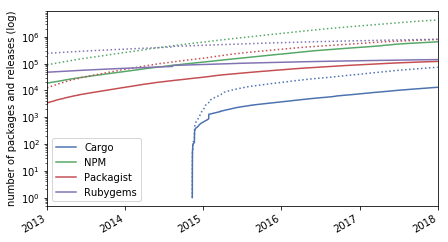

In [10]:
fig, ax = matplotlib.pyplot.subplots()

for ecosystem in ECOSYSTEMS:
    (
        df_versions[ecosystem]
        .set_index('date')
        .sort_index()
        .drop_duplicates(['package'], keep='first')
        .assign(**{ecosystem: 1})
        [[ecosystem]]
        .cumsum()
        .plot(ax=ax, color=COLORS[ecosystem])
    )
    
    (
        df_versions[ecosystem]
        .set_index('date')
        .sort_index()
        .assign(**{ecosystem: 1})
        [[ecosystem]]
        .cumsum()
        .plot(ax=ax, legend=False, style=':', color=COLORS[ecosystem])
    )
    
ax.set(
    xlabel='',
    xlim=DATE_RANGE,
    ylabel='number of packages and releases (log)',
    yscale='log', 
)

savefig(fig, 'overview_number_packages_releases')

## Number of dependencies

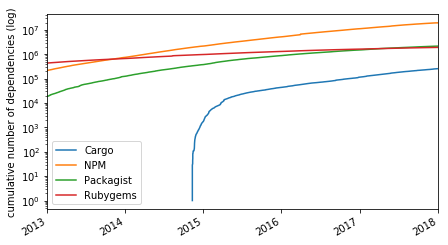

In [9]:
fig, ax = matplotlib.pyplot.subplots()

for ecosystem in ECOSYSTEMS:
    (
        df_dependencies[ecosystem]
        .set_index('date')
        .sort_index()
        .assign(**{ecosystem: 1})
        [[ecosystem]]
        .cumsum()
        .plot(ax=ax, color=COLORS[ecosystem])
    )
    
ax.set(
    xlabel='',
    xlim=DATE_RANGE,
    ylabel='cumulative number of dependencies (log)',
    yscale='log', 
)

savefig(fig, 'overview_number_dependencies')

## Proportion of valid internal dependencies

In [ ]:
fig, ax = matplotlib.pyplot.subplots()

for ecosystem in ECOSYSTEMS:
    (
        df_dependencies[ecosystem]
        .set_index('date')
        .sort_index()
        .assign(total=1)
        [['empty', 'total']]
        .cumsum()
        .assign(**{ecosystem: lambda d: (d['total'] - d['empty']) / d['total']})
        [[ecosystem]]
        .plot(ax=ax, color=COLORS[ecosystem])
    )
    
ax.set(
    xlabel='',
    xlim=DATE_RANGE,
    ylabel='proportion of dependencies',
    ylim=(0.75, 1.00),
)

savefig(fig, 'overview_proportion_valid_dependencies')

# Package updates

## Number of updates by month

## Proportion of major, minor and patches by month

# Dependency constraints

## Proportion of strict constraints

## Proportion upper and lower bounded

## Proportion allowing major, minor or patch updates

## Proportion allowing backward compatible and backward incompatible updates

## Proportion allowing backward compatible updates only

# Dependency constraints aggregated by releases

## Monthly proportion of releases with at least one strict constraint

## Monthly proportion of releases with bounded constraints

## Monthly proportion of releases with all constraints allowing major, minor or patches updates

## Monthly proportion of releases with all constraints allowing backward compatible/incompatible updates

## Monthly proportion of releases with all constraints allowing backward compatible updates only